In [1]:
#FAQ
# 1. Does the number of restaurants depend on the area?
# 2. Relation between area and type of restaurants
# 3. How much minimum it will cost for two people in a particular area?
# 4. Approx spending in a particular area for two people
# 5. Does online order facility affect number of votes?
# 6. Does online order facility affect average rating of a restaurants?
# 7. Does a table booking facility affect the average rating of a restaurant?
# 8. Does restaurant rating depend on location?
# 9. Does number of votes depend on restaurant type?
# 10. Does a particular type of restaurant get more ratings than other types?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df['address'].iloc[0] # To check address format

'942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'

In [7]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [8]:
df['listed_in(city)'].nunique()

30

In [9]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [10]:
df['location'].nunique()

93

In [11]:
df.shape

(51717, 17)

In [12]:
# Renaming of column

In [13]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost_2', 'listed_in(type)': 'type', 'rate':'rating'}, inplace=True)
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rating',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost_2', 'reviews_list', 'menu_item', 'type',
       'listed_in(city)'],
      dtype='object')

In [14]:
df = df[['name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'type', 'approx_cost_2']]
df.head()

,name,online_order,book_table,rating,votes,location,type,approx_cost_2
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Buffet,800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Buffet,800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,Buffet,800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Buffet,300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Buffet,600


In [15]:
# Data Cleaning

In [16]:
df.duplicated().unique()

array([False,  True])

In [17]:
df.drop_duplicates(inplace=True, keep='first')

In [18]:
df.shape

(34857, 8)

In [19]:
# Drop nan from location and approx cost
# Drop restaurants with zero cost 
df = df[(~df['location'].isna())& (~df['approx_cost_2'].isna())]
df.reset_index(inplace=True, drop=True) # drop index column

In [20]:
df.shape

(34636, 8)

In [21]:
df.isna().sum()

name                0
online_order        0
book_table          0
rating           3676
votes               0
location            0
type                0
approx_cost_2       0
dtype: int64

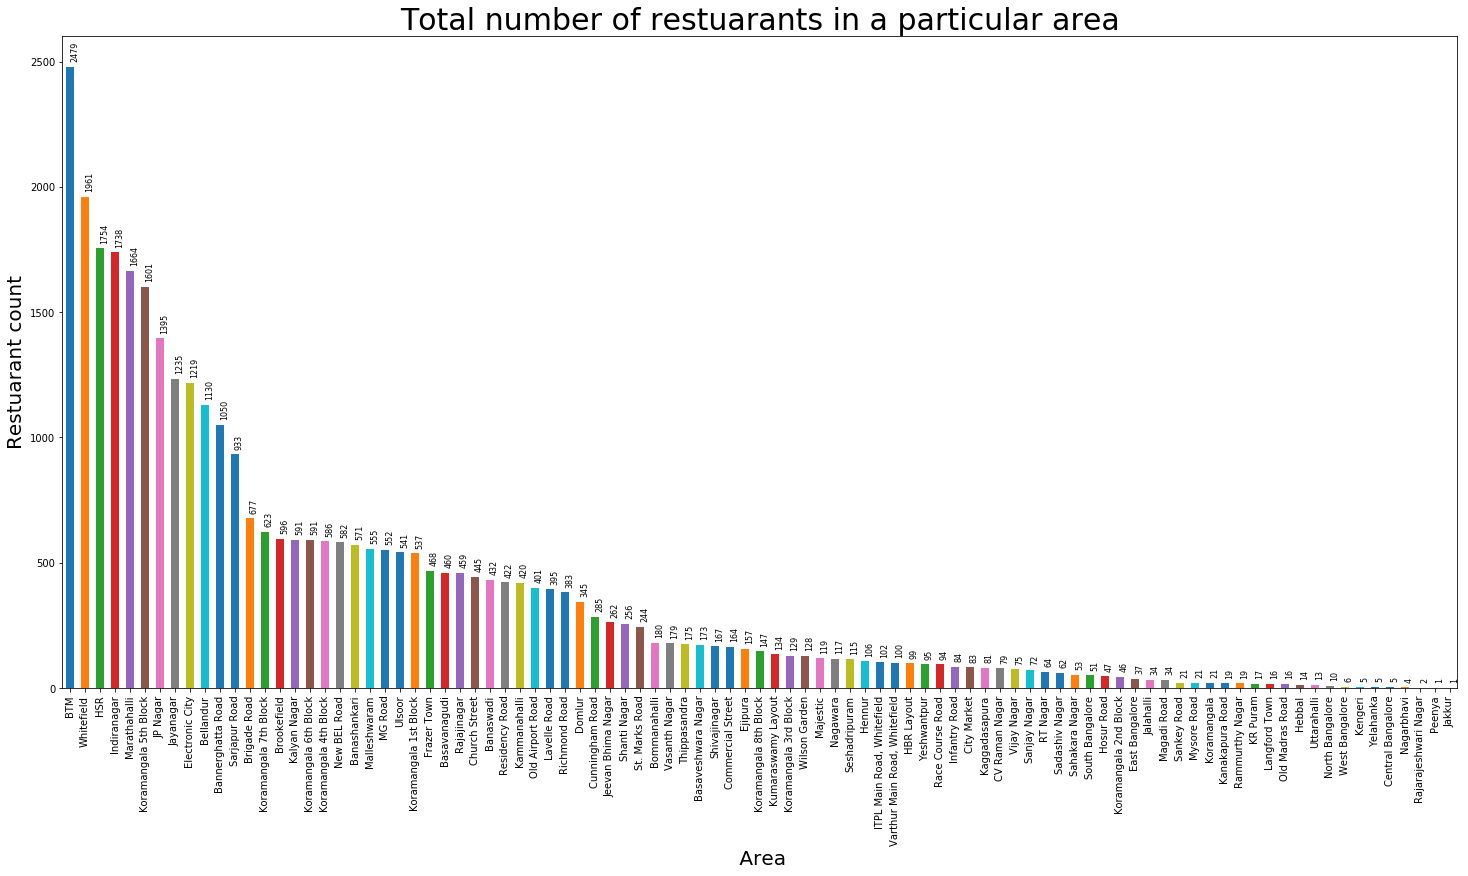

In [22]:
# 1. Total number of restuarant in a particular area
count = df['location'].value_counts()
ax = count.plot(kind='bar', figsize=(25, 12))
ax.set_xlabel(' Area', fontsize=20)
ax.set_ylabel('Restuarant count', fontsize=20)
ax.set_title('Total number of restuarants in a particular area', fontsize=30)
for i, v in enumerate(count):
    plt.text(i, v+20, str(v), rotation=90, verticalalignment='bottom', fontsize=8)
plt.show()

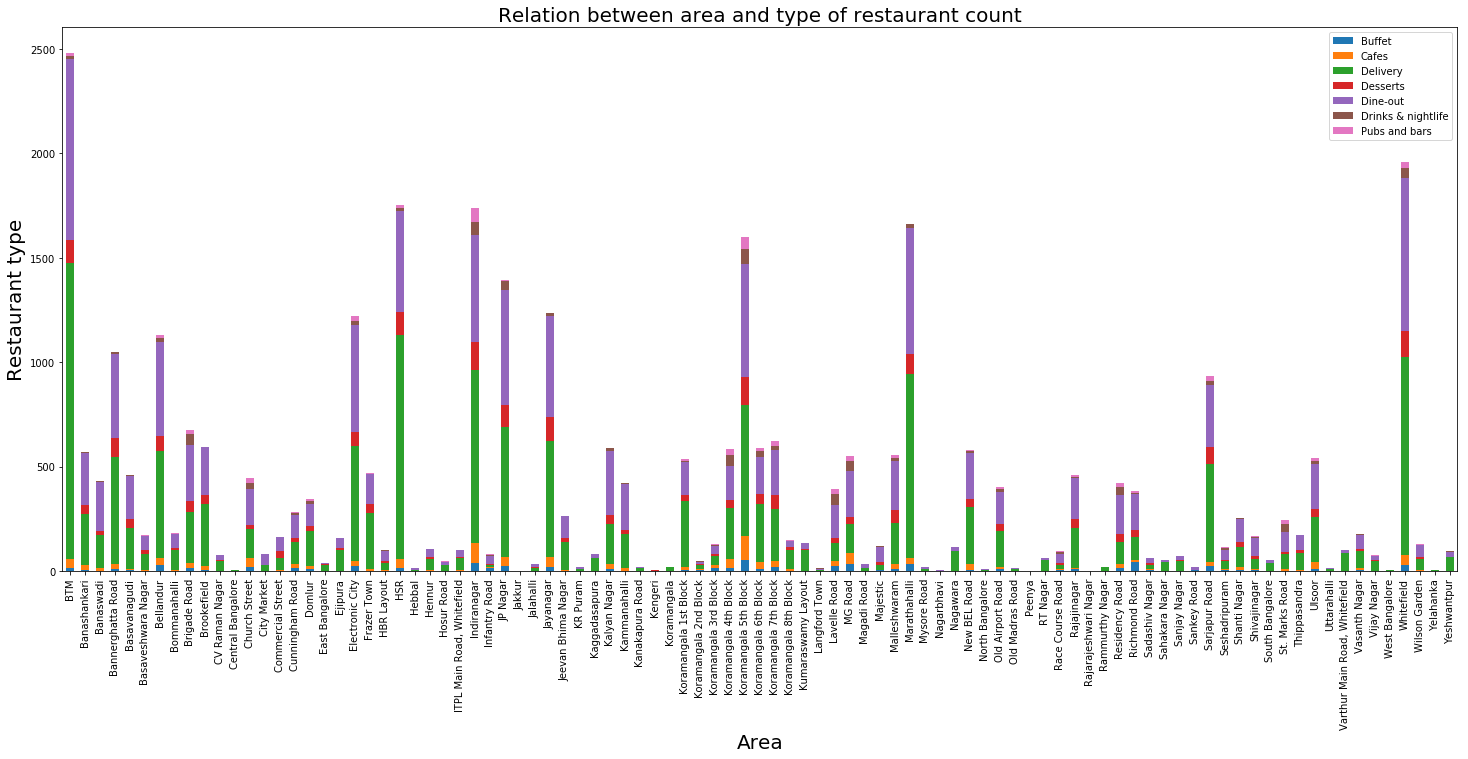

In [23]:
# 2. Relation between area and type of restaurant count
temp = df[['location', 'type']].groupby(['location', 'type']).size().reset_index()
ax = temp.set_index(['location', 'type']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Relation between area and type of restaurant count', fontsize=20)
ax.set_xlabel('Area', fontsize=20)
ax.set_ylabel('Restaurant type', fontsize=20)
ax.legend(temp['type'].unique())
plt.show()

In [24]:
# approx cost data is not uniform, in some rows it is for 2 person and for other one person
# To make it uniform 

In [25]:
for i in df.index:
        if df['approx_cost_2'].iloc[i][1] == ',':
            if df['approx_cost_2'].iloc[i][0] =='2':
                df.loc[df.index==i, ['approx_cost_2']] = 2*int(df['approx_cost_2'].iloc[i][2:])
            else:
                df.loc[df.index==i, ['approx_cost_2']] = df['approx_cost_2'].iloc[i][2:]

In [26]:
df['approx_cost_2'] = df['approx_cost_2'].astype(int)

In [27]:
df['votes'] = df['votes'].astype(int)

In [28]:
# Drop restaurants with zero cost 
df.where(df['approx_cost_2']>0, inplace=True)
df = df[~df['approx_cost_2'].isna()]

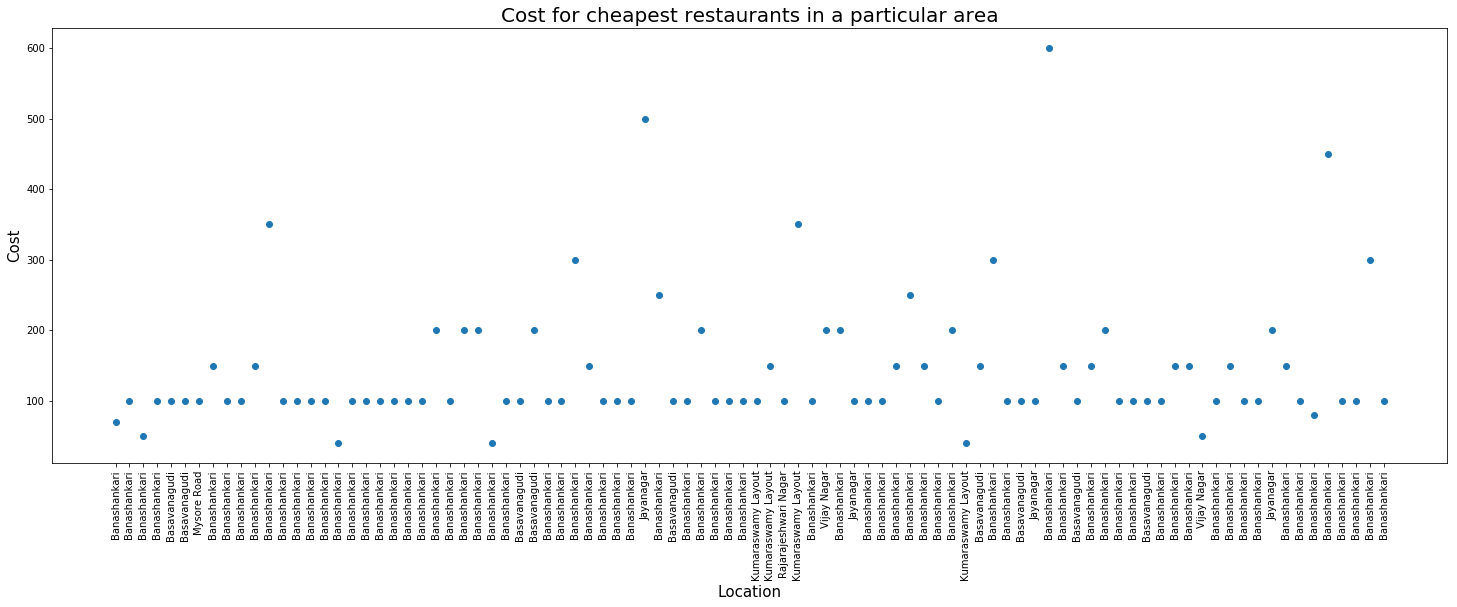

In [45]:
# 3. Cost for cheapest restaurants in a particular area
temp = df[['name', 'location', 'approx_cost_2']].loc[df.groupby('location')['approx_cost_2'].idxmin()].reset_index()
temp['location'] = temp['location'].astype('category')
temp['loc_id'] = temp.location.cat.codes
plt.scatter(x=temp['loc_id'], y =temp['approx_cost_2'])
plt.xticks(temp['loc_id'].tolist(), df['location'], rotation=90)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost for cheapest restaurants in a particular area', fontsize=20)
plt.rcParams['figure.figsize'] = [25,8]
plt.show()

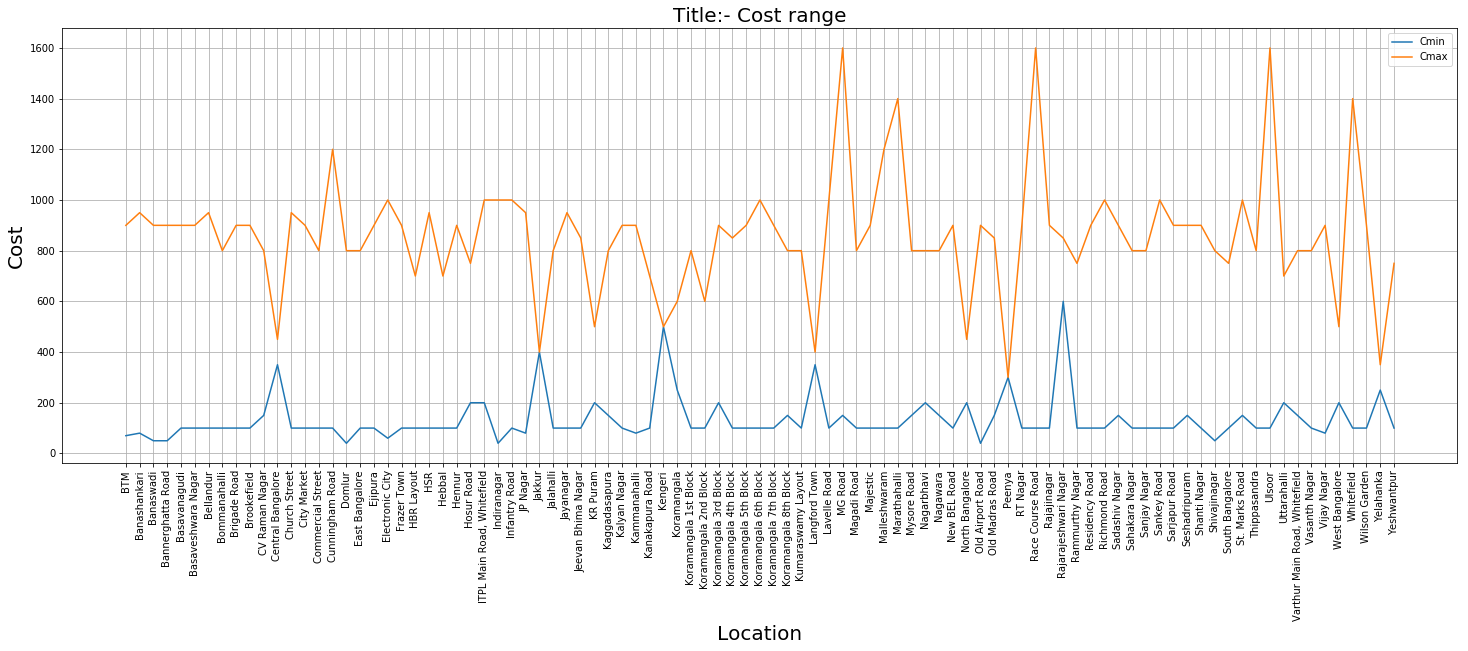

In [30]:
# 4. cost range per area
temp = df.groupby('location')['approx_cost_2'].agg([('Cmin','min'), ('Cmax','max')])
ax = temp.plot(figsize=(25,8), grid=True)
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Location', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.set_title('Title:- Cost range', fontsize=20)
plt.show()

In [31]:
df = df[df['votes']>0] # calculation only for positive votes

In [32]:
df.isna().sum()

name              0
online_order      0
book_table        0
rating           38
votes             0
location          0
type              0
approx_cost_2     0
dtype: int64

In [33]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', nan, '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.0 /5', '1.8 /5', '2.2 /5'], dtype=object)

In [34]:
# replace nan with 0/5
df['rating'].fillna('0/5', inplace=True)

In [35]:
df['rating']=df['rating'].apply(lambda x: x[:-2]) # strip '/5' from rating

In [36]:
df['rating'] = df['rating'].astype(float)

In [37]:
# Number of restaurants with online ordering facility
df.groupby('online_order').size()

online_order
No      9559
Yes    18553
dtype: int64

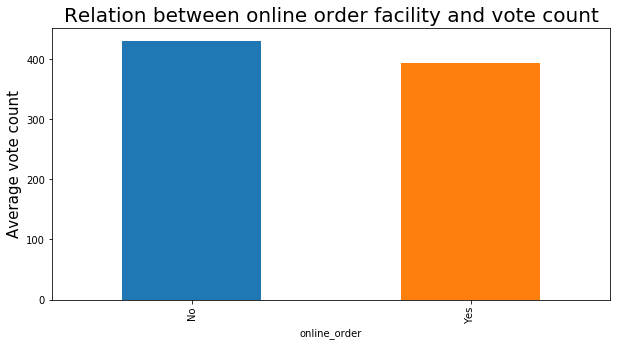

In [38]:
# 5. Relation between online order facility and avg vote
temp = df.groupby('online_order')['votes'].mean()
ax = temp.plot(kind='bar', figsize=(10,5))
ax.set_title('Relation between online order facility and vote count', fontsize=20)
ax.set_ylabel('Average vote count', fontsize=15)
plt.show()

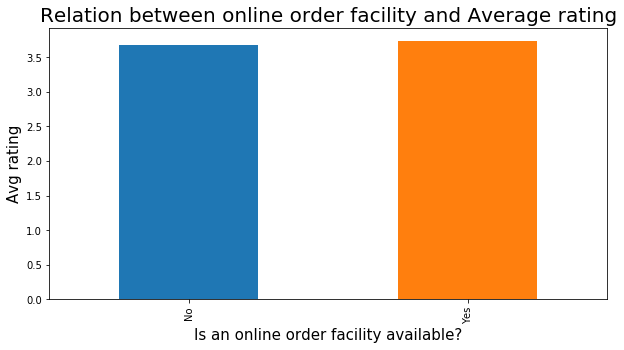

In [39]:
# 6. Relation between online order facility and ave rating
temp = df.groupby('online_order')['rating'].mean()
ax = temp.plot(kind='bar', figsize=(10,5))
ax.set_title('Relation between online order facility and Average rating', fontsize=20)
ax.set_ylabel('Avg rating', fontsize=15)
ax.set_xlabel('Is an online order facility available?', fontsize=15)
plt.show()

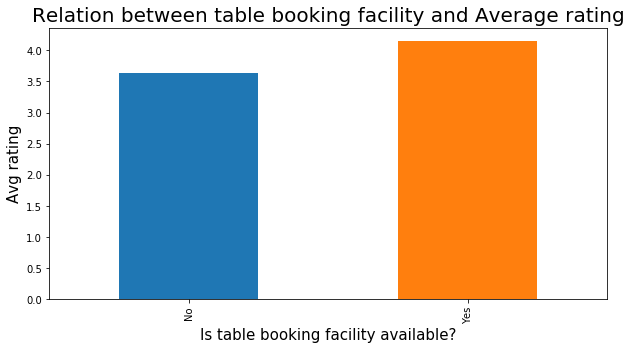

In [40]:
# 7. Relation between table booking and rating
temp = df.groupby('book_table')['rating'].mean()
ax = temp.plot(kind='bar', figsize=(10,5))
ax.set_title('Relation between table booking facility and Average rating', fontsize=20)
ax.set_ylabel('Avg rating', fontsize=15)
ax.set_xlabel('Is table booking facility available?', fontsize=15)
plt.show()

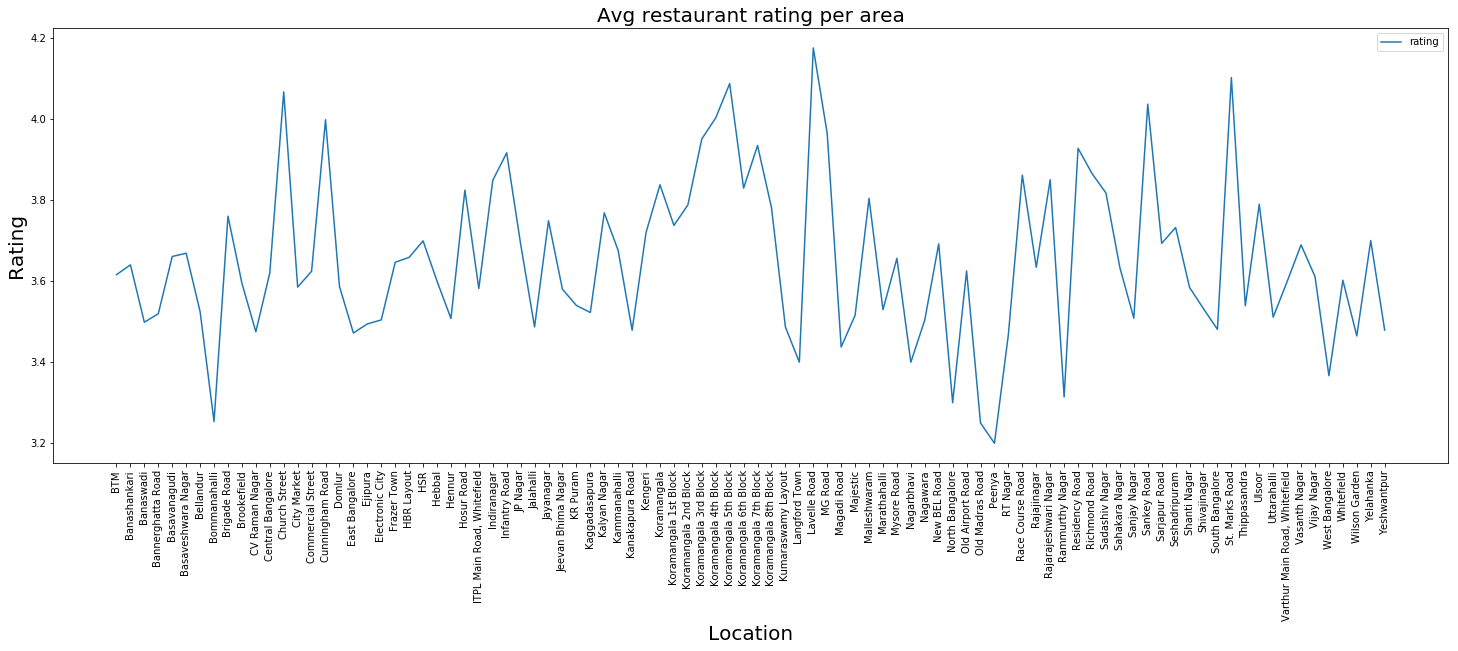

In [41]:
# 8. Avg restaurant rating per area
temp= df.groupby('location')['rating'].mean().reset_index()
ax = temp.plot()
ax.set_xticks(temp.index)
ax.set_xticklabels(temp['location'], rotation=90)
ax.set_xlabel('Location', fontsize=20)
ax.set_ylabel('Rating', fontsize=20)
ax.set_title('Avg restaurant rating per area', fontsize=20)
plt.show()

In [42]:
# Total count of a particular type of restaurant
df.groupby('type').size()

type
Buffet                  531
Cafes                  1085
Delivery              13131
Desserts               1993
Dine-out              10244
Drinks & nightlife      676
Pubs and bars           452
dtype: int64

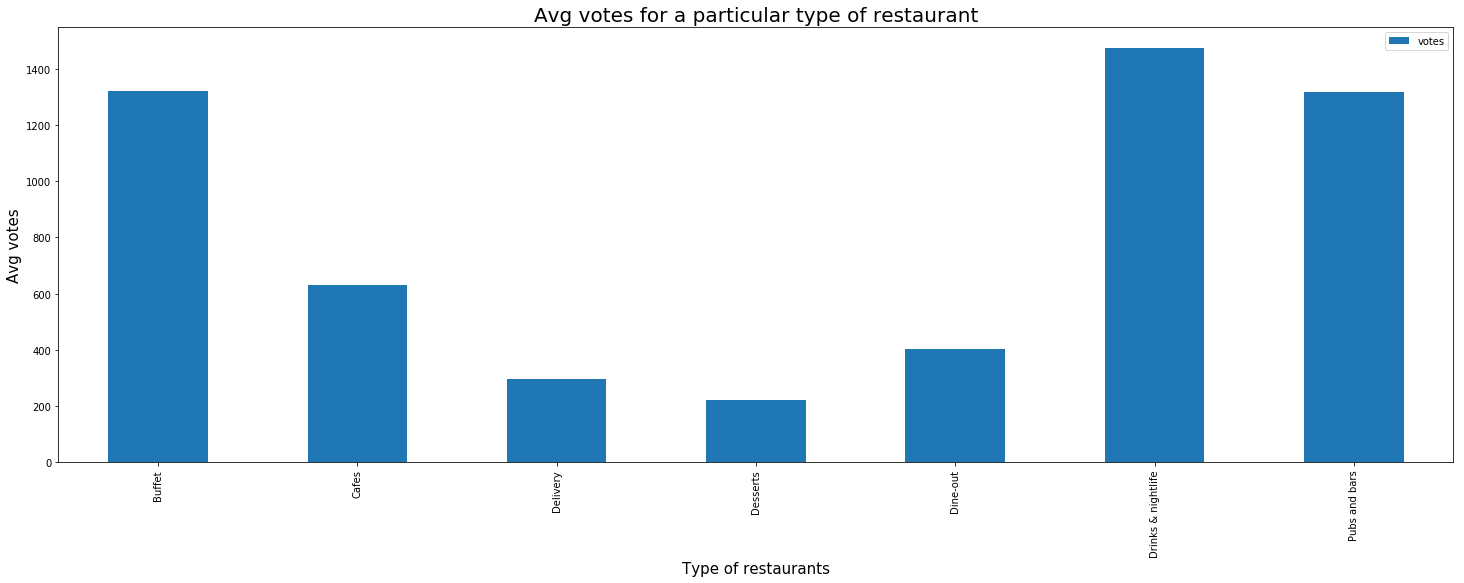

In [43]:
# 9. Does particular type of restaurants get more votes than other type?
temp = df.groupby('type')['votes'].mean().reset_index()
ax = temp.plot(kind='bar')
ax.set_xticks(temp.index)
ax.set_xticklabels(temp['type'], fontsize=10)
ax.set_ylabel('Avg votes', fontsize=15)
ax.set_xlabel('Type of restaurants', fontsize=15)
ax.set_title('Avg votes for a particular type of restaurant', fontsize=20)
plt.show()

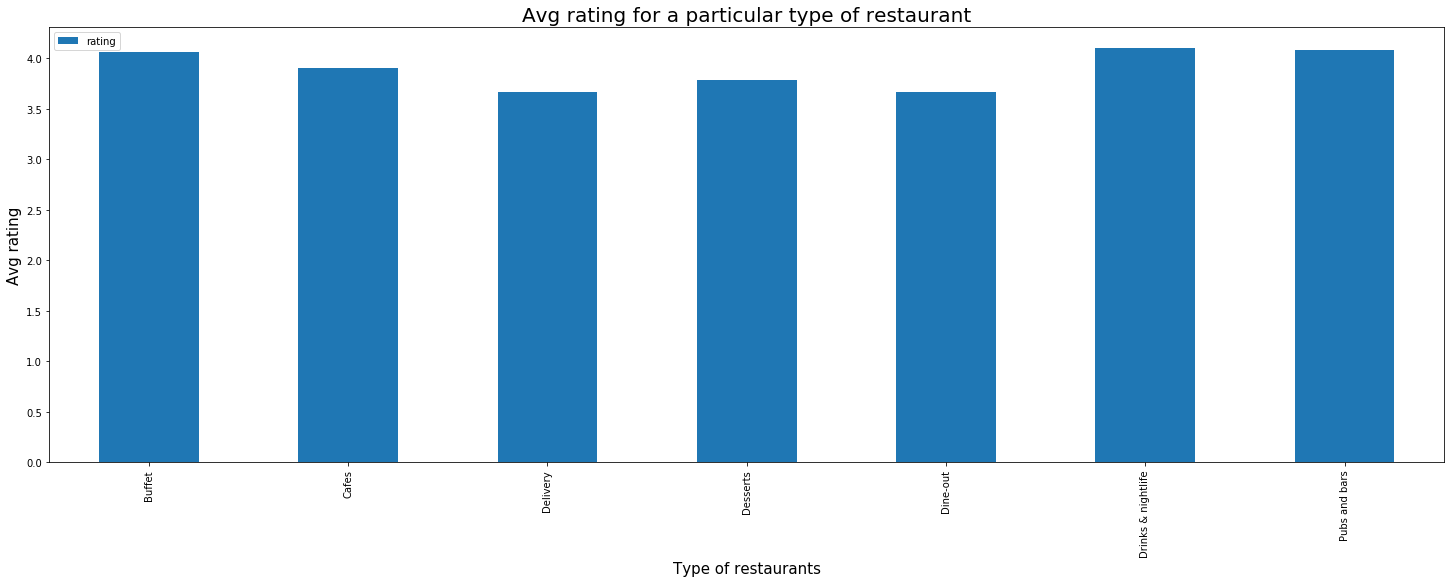

In [44]:
# 10. Does particular type of restaurants get more rating than other type?
temp = df.groupby('type')['rating'].mean().reset_index()
ax = temp.plot(kind='bar')
ax.set_xticks(temp.index)
ax.set_xticklabels(temp['type'], fontsize=10)
ax.set_ylabel('Avg rating', fontsize=15)
ax.set_xlabel('Type of restaurants', fontsize=15)
ax.set_title('Avg rating for a particular type of restaurant', fontsize=20)
plt.show()